## Testing different physics based reward functions, to understand how well they can be applied to RL rewards

In [184]:
import numpy as np

def calculate_diffusion_coefficient_between_timesteps(array1, array2):
  """Calculates the diffusion coefficients of the particles (vehicles).

  Args:
    array1: The state vector containing state at time t.
    array2: The state vector containing state at time t+1.
  Returns:
    The diffusion coefficient. 
    >0 represents array2 is a better state than array 1
  """
  # Calculate the mean squared displacement of the particles
  diffusion_coefficient = np.mean(np.sign(array1-array2)*(array2-array1)**2)
  return diffusion_coefficient


def calculate_weighted_shannon_entropy_difference(array_1, array_2):
  """Calculates the entropy difference between two arrays.

  Args:
    array1: A NumPy array.
    array2: A NumPy array.

  Returns:
    The entropy difference between the two arrays.
    > 0 values represents that array2 is a better state than array 1
  """

  # add small number to both arrays to make sure log(0) doesnt happen
  array1 = np.add(array_1,1)
  array2 = np.add(array_2,1)

  weighted_entropy1 = -np.sum(array1 * np.log(array1))

  weighted_entropy2 = -np.sum(array2 * np.log(array2))

  entropy_difference = weighted_entropy2 - weighted_entropy1
  return entropy_difference

def calculate_shannon_entropy(array_):
  """Calculates the Shannon entropy of an array.

  Args:
    array: A NumPy array.

  Returns:
    The Shannon entropy of the array.
  """
  # add one to array to make sure log(0) doesnt happen
  array = np.add(array_, 1)
  p = array  / np.sum(array)
  entropy = -np.sum(p * np.log(p))
  return entropy

def calculate_gini_coefficient(array):
  """Calculates the Gini coefficient of an array.

  About:
    The Gini coefficient is a measure of inequality. 
    It is calculated by comparing the cumulative 
    distribution function of the data to a perfectly 
    equal distribution. A higher Gini coefficient 
    indicates a more unequal distribution.

  Args:
    array: A NumPy array.

  Returns:
    The Gini coefficient of the array.
  """

  x_mean = np.mean(array)
  var_x = np.var(array)

  gini_coefficient = 1 - np.sum((array - x_mean)**2 / (len(array) * var_x))
  return gini_coefficient

def calculate_coefficient_of_variation(array):
  """Calculates the coefficient of variation of an array.

  Args:
    array: A NumPy array.

  Returns:
    The coefficient of variation of the array.
  """

  standard_deviation = np.std(array)
  mean = np.mean(array)

  coefficient_of_variation = standard_deviation / mean
  return coefficient_of_variation

def calculate_interquartile_range(array):
  """Calculates the interquartile range of an array.

  Args:
    array: A NumPy array.

  Returns:
    The interquartile range of the array.
  """

  q1 = np.percentile(array, 25)
  q3 = np.percentile(array, 75)

  interquartile_range = q3 - q1
  return interquartile_range

def calculate_skewness(array):
  """Calculates the skewness of an array.

  Args:
    array: A NumPy array.

  Returns:
    The skewness of the array.
  """

  mean = np.mean(array)
  standard_deviation = np.std(array)

  skewness = (mean - np.median(array)) / standard_deviation
  return skewness

def calculate_kurtosis(array):
  """Calculates the kurtosis of an array.

  About:
    The kurtosis coefficient is a measure of the 
    peakedness of a distribution. It is 
    calculated by comparing the fourth moment of 
    the data to the fourth moment of a normal
    distribution. A higher kurtosis coefficient 
    indicates a more peaked distribution.

  Args:
    array: A NumPy array.

  Returns:
    The kurtosis of the array.
  """

  mean = np.mean(array)
  standard_deviation = np.std(array)

  kurtosis = (np.mean((array - mean)**4) / standard_deviation**4) - 3
  return kurtosis

# Create two arrays
array1 = np.array([0,1, 1,0, 1,2, 1,1])
array2 = np.array([1,0, 1,1, 1,0, 0,1])

array1 = np.random.randint(0, 5, size=8)
array2 = np.random.randint(0, 5, size=8)

# Calculate all the measures
entropy_difference = calculate_weighted_shannon_entropy_difference(array1, array2)
diffusion_coefficient = calculate_diffusion_coefficient_between_timesteps(array1, array2)

shannon_entropy1 = calculate_shannon_entropy(array1)
shannon_entropy2 = calculate_shannon_entropy(array2)
gini_coefficient1 = calculate_gini_coefficient(array1)
gini_coefficient2 = calculate_gini_coefficient(array2)
coefficient_of_variation1 = calculate_coefficient_of_variation(array1)
coefficient_of_variation2 = calculate_coefficient_of_variation(array2)
interquartile_range1 = calculate_interquartile_range(array1)
interquartile_range2 = calculate_interquartile_range(array2)
skewness1 = calculate_skewness(array1)
skewness2 = calculate_skewness(array2)
kurtosis1 = calculate_kurtosis(array1)
kurtosis2 = calculate_kurtosis(array2)

print("arrays:                                 ", array1, array2)
print("total # vehicles:                       ", np.sum(array1), np.sum(array2))
print("weighted shannon entropy difference:    ", entropy_difference)
print("Diffusion coefficient:                  ", diffusion_coefficient)
print("**********************************************************************************")
print("**********************************************************************************")
print("shannon entropies:                      ", shannon_entropy1, shannon_entropy2)
print("shannon entropy difference:             ", shannon_entropy2-shannon_entropy1)

print("gini:                                   ", gini_coefficient1, gini_coefficient2)
print("coef of variation:                      ", coefficient_of_variation1, coefficient_of_variation2)
print("iqr:                                    ", interquartile_range1, interquartile_range2)
print("skewness:                               ", skewness1, skewness2)
print("kurtosis:                               ", kurtosis1, kurtosis2)




arrays:                                  [0 1 3 3 1 4 2 1] [2 1 4 4 4 2 4 4]
total # vehicles:                        15 25
weighted shannon entropy difference:     -21.621651503487435
Diffusion coefficient:                   -3.0
**********************************************************************************
**********************************************************************************
shannon entropies:                       1.9793088072120355 2.035479806800388
shannon entropy difference:              0.056170999588352366
gini:                                    0.0 0.0
coef of variation:                       0.6765927710061479 0.37309516212355265
iqr:                                     2.0 2.0
skewness:                                0.29559878344928797 -0.7504787743864564
kurtosis:                                -1.1799415590536333 -1.2057074910820456


In [185]:
# a class to keep track of state vector in part c
import matplotlib.pyplot as plt
import random
import copy
import pandas as pd
import numpy as np
from scipy.spatial import KDTree

# representation of xt defined in HW1 Simulation Vehicle traffic
class x_state:
    def __init__(self):
        self.state = {'E': {'F': 0, 'L': 0}, 'N': {'F': 0, 'L': 0}, 'W': {'F': 0, 'L': 0}, 'S': {'F': 0, 'L': 0}}
    
    def __eq__(self, other):
        if isinstance(other, x_state):
            return self.state == other.state
        return False
    
    def self_sum(self):
        result = 0
        for direction in self.state:
            for lane in self.state[direction]:
                # Calculate the sum of values within each direction and square the result
                result += self.state[direction][lane]
        return result

    def distance_metric(self, other):
        if isinstance(other, x_state):
            difference = self - other
            return difference.sum_and_square()
        
        else:
            raise ValueError("Distance metric is only defined for x_state objects.")

    def sum_and_square(self):
        result = 0
        for direction in self.state:
            for lane in self.state[direction]:
                # Calculate the sum of values within each direction and square the result
                result += self.state[direction][lane]

        return result**2
    
    def __sub__(self, other):
        if isinstance(other, x_state):
            result_state = {}
            for direction in self.state:
                result_state[direction] = {}
                for lane in self.state[direction]:
                    result_state[direction][lane] = self.state[direction][lane] - other.state[direction][lane]
            new_x_state = x_state()
            new_x_state.state = result_state
            return new_x_state
        else:
            raise ValueError("Subtraction is only defined for x_state objects.")
        
    def to_numpy(self):
        return np.array(self.__get_values_tuple())
    
    @classmethod
    def numpy_to_x_state(cls, np_state):
        state = x_state()
        i = 0
        for direction in state.state:
            for lane in state.state[direction]:
                # Calculate the sum of values within each direction and square the result
                state.state[direction][lane] = np_state[i]
                i+=1
        return state
        
    def __get_values_tuple(self):
        # Use a nested list comprehension to extract values from inner dictionaries
        values_list = [value for inner_dict in self.state.values() for value in inner_dict.values()]
        # Convert the list of values into a tuple
        values_tuple = tuple(values_list)
        return values_tuple

    def __hash__(self):
        # To make the object hashable, convert the nested dictionaries to a frozenset
        return hash(self.__get_values_tuple())
    
    def __str__(self):
        result = ""
        for direction, values in self.state.items():
            result += f"{direction}: F={values['F']}, L={values['L']}, "
        return result

class memory():
    def __init__(self, q_table, gamma, alpha, duration) -> None:
         # columns: "distance metric-sum of elemnts ^2, optimal action, optimal R_a"
         self.columns =['d', 'a', 'R']
         self.memory_table = pd.DataFrame(columns=self.columns)
         self.append_using_q_table(q_table=q_table)
         self.size_time = np.zeros(duration)
         self.size_time[0] = self.memory_table.shape[0]
         self.short_term_Q = pd.DataFrame(columns=q_table.columns, dtype=np.float64)
         self.short_term_memory_size = 20
         self.gamma = gamma
         self.alpha = alpha
    
    def update_size_time_array(self,i):
        self.size_time[i] = self.memory_table.shape[0]

    def append_using_q_table(self, q_table):
        for s in q_table.index:
            d = s.self_sum()
            a = q_table.columns[np.nanargmax(q_table.loc[s])]
            r = q_table.loc[s,a]
            self._insert(s,d,self.parse_formatted_action(a),r)

    def _insert(self, state, d, a, r):
        # find the eq state,action pair which has max rew
        best_state, best_action, in_memory = self.read_memory_table(memory_type='long', state=state)
        if not in_memory:
            new_row = pd.Series([d,a,r], 
                                index=self.columns, 
                                name=state)
            self.memory_table = pd.concat([self.memory_table, new_row.to_frame().T])
        else:
            # see if the reward is significantly better than update the memory
            if self.memory_table['R'][best_state]+0.005 < r:
                self.memory_table['a'][best_state] = a
                self.memory_table['R'][best_state] = r

    def insert(self,current_state, current_action, reward, state_next, action_next, done):
        # short term memory is full, time to append it to long term memory table
        if self.short_term_Q.shape[0]==self.short_term_memory_size:
            # find the size//2 most frequent states in short term memory, i.e. ones with biggest rewards
            q = self.short_term_Q.nlargest(self.short_term_memory_size, self.short_term_Q.columns)
            self.append_using_q_table(q)
            #empty the short term memory buffer
            self.short_term_Q = pd.DataFrame(columns=self.short_term_Q.columns, dtype=np.float64)
        
        # short term memory is not empty, 
        # treat it as Q table in sarsa
        self.update_q_table(current_state, current_action, reward, state_next, action_next, done)



    def q_table_check_if_state_exist(self, state):
        nearby_state, action, in_memory = self.read_memory_table(memory_type='short', state=state)
        # no similar states, so a unique state found!
        if not in_memory:
            new_row = pd.Series([0] * len(self.short_term_Q.columns), 
                                index=self.short_term_Q.columns, 
                                name=state)
            self.short_term_Q = pd.concat([self.short_term_Q, new_row.to_frame().T])
            return state
        else:
            return nearby_state

    def update_q_table(self,current_state, current_action, reward, state_next, action_next, done):
        state = current_state
        action = current_action

        action_string = self.format_action(action)
        action_next_string = self.format_action(action_next)

        state = self.q_table_check_if_state_exist(state)
        state_next = self.q_table_check_if_state_exist(state_next)

        q_value_predict = self.short_term_Q.loc[state, action_string]
        if not done:
            q_value_real = reward + self.gamma * self.short_term_Q.loc[state_next, action_next_string]
        else:
            q_value_real = reward
        self.short_term_Q.loc[state, action_string] += self.alpha * (q_value_real - q_value_predict)


    # def insert(self, state):
        
    #     if state not in self.memory_table.index:
    #          # check if the 
    #          pass
    # returns nearby states,action if it is in memory table
    def read_memory_table(self, memory_type, state, tolerence=1):
        if(memory_type=='long'):
            memory = self.memory_table  
        elif(memory_type=='short'):
            memory = self.short_term_Q

        if(memory.shape[0]==0):
            in_memory = False
            return None, None, in_memory

        if state in memory.index:
            in_memory = True
            # basically we know the state exists in the memory, so just use it as it is
            if memory_type =='long':
                nearby_state = state
                action = self.memory_table.loc[nearby_state]['a']
            else:
                nearby_state = state
                target_actions = self.short_term_Q.loc[state, :]
                target_actions = target_actions.reindex(np.random.permutation(target_actions.index))
                target_action = target_actions.idxmax()
                action = self.parse_formatted_action(target_action)
                
        else:
            # the state is not in memeory, find a nearby state and use it 
            data = np.vstack(memory.index.map(x_state.to_numpy).values)
            kd = KDTree(data)
            indexes = kd.query_ball_point(state.to_numpy(), r=tolerence)
            in_memory = True

            # didnt find a nearyb state
            if(len(indexes)==0):
                in_memory = False
                return None, None, in_memory
            nearby_points = data[indexes]
            nearby_states = [x_state.numpy_to_x_state(nearby_point) for nearby_point in nearby_points]
            if memory_type =='long':
                nearby_table =  self.memory_table.loc[nearby_states]
                nearby_state = nearby_table.index[nearby_table['R'].to_numpy().argmax()]
                action = nearby_table.loc[nearby_state]['a']
            else:
                nearby_state,action = self.short_term_Q.loc[nearby_states].stack().idxmax()
                action = self.parse_formatted_action(action)

        return nearby_state, action, in_memory


        
    # return the action when its in memory or close to state otherwise 
    def get_action_from_memory(self, next_state):
        d = next_state.self_sum()
        tolerance = 2
        in_memory = False
        a = None
    

        #check if its in long term memory first
        best_state, l_action, in_long_term_memory = self.read_memory_table(memory_type='long', state=next_state)
        best_state, s_action, in_short_term_memory = self.read_memory_table(memory_type='short', state=next_state)
        if in_long_term_memory:
            in_memory = True
            a = l_action
        #not in long term, check if its in short term
        elif in_short_term_memory:
            in_memory = True
            a = s_action    
        # not in memory sadlys
        else:
            in_memory = False

        return in_memory, a
            
    # convert the formatted action string back to action
    def parse_formatted_action(self, formatted_action):
            try:
                # Remove the parentheses and split the string into two parts
                parts = formatted_action.strip("()").split("),(")
                
                if len(parts) != 2:
                    raise ValueError("Invalid formatted action string")

                # Split the two parts into lists
                part1 = parts[0].split(',')
                part2 = parts[1].split(',')

                # Return the parsed action
                return (part1, part2)
            except ValueError as e:
                print(f"Error parsing formatted action: {e}")
                return None
    # used to convert actions to strings
    def format_action(self, action):
            formatted_action = f"(({','.join(action[0])}),({','.join(action[1])}))"
            return formatted_action


    

class vehicles:
    def __init__(self, duration) -> None:
        self.duration = duration
        # arrival rates in lamda platoons per second
        self.arrival_rates = {'E': 5/60, 'N': 5/60, 'W': 10/60, 'S': 7/60}
        self.line_assignment_p = [0.7, 0.3]
        self.lanes = ['F', 'L']
        self.arrival_times_df, self.departure_times_df = self.generate_arrival_times_with_lanes()
        self.vehicle_depart_index = {'E': {'F': 0, 'L': 0}, 'N': {'F': 0, 'L': 0}, 'W': {'F': 0, 'L': 0}, 'S': {'F': 0, 'L': 0}}
      
    def move_vehicle(self, next_state, current_action, i):
        for direction in self.arrival_rates.keys():
            for lane in self.lanes:
                column = self.arrival_times_df[(direction,lane)]
                count = ((column >= i) & (column < i+1)).sum()
                next_state.state[direction][lane] += count
        # Calculate departing vehicles
        if i >= 1:
            for direction in current_action[0]:
                for lane in current_action[1]:
                    if next_state.state[direction][lane]>0:
                        # update the state that vehicle is gone
                        next_state.state[direction][lane]-=1

                        # update my vehicles df and add the departure time
                        last_index = self.vehicle_depart_index[direction][lane]
                        next_index = (self.arrival_times_df[(direction,lane)][last_index:].notna()).idxmax()
                        
                        
                        if not pd.isna(next_index):
                            self.departure_times_df[(direction,lane)][next_index] = i + 1
                            self.vehicle_depart_index[direction][lane] = next_index+1
        

    def generate_arrival_times_with_lanes(self):
        self.arrival_times = self.generate_arrival_times()
        # print(arrival_times)
        df = pd.DataFrame(self.arrival_times)
        # Use the explode function to convert lists into separate rows
        df = df.apply(lambda x: x.explode(), axis=0)
        # Reset the index
        df = df.reset_index(drop=True)


        # Create lane assignments for each cell in the DataFrame
        lane_assignments = np.random.choice(self.lanes, size=df.shape, p=self.line_assignment_p)

        # Split the original DataFrame into separate DataFrames based on lane assignments
        # Initialize an empty DataFrame to store the split data
        split_dfs = []
        for lane in self.lanes:
            mask = lane_assignments == lane
            split_data = df.values * mask
            split_df = pd.DataFrame(split_data, columns=[(col,lane) for col in df.columns])
            split_dfs.append(split_df)

        # Combine the split DataFrames into a single DataFrame
        arrival_times_df = pd.concat(split_dfs, axis=1)
        arrival_times_df = arrival_times_df.replace(0, np.nan)
        arrival_times_df[arrival_times_df>=self.duration] = np.nan
        arrival_times_df = arrival_times_df.dropna(how='all').reset_index(drop=True)
        departure_times_df = pd.DataFrame(columns=arrival_times_df.columns, index=arrival_times_df.index)

        return arrival_times_df, departure_times_df

    def generate_arrival_times(self):
        # generate arrival times
        t = 0
        arrival_times = []
        for i in range(self.duration):
            # Simulate the homogeneous Poisson process for arrival times
            times = {'E':[], 'N': [], 'W': [], 'S': []}
            while t <= i:
                for direction in self.arrival_rates.keys():
                    inter_arrival_time = random.expovariate(self.arrival_rates[direction])
                    t += inter_arrival_time
                    times[direction].append(t)
            arrival_times.append(times)
        return arrival_times
  
    

# a list of states in time with different methods to check for unique states and plotting the state graphs
class x_state_t:
    def __init__(self, duration, action_duration, arrival_rates, A,  reward_function, alpha=0.7, gamma=0.3, epsilon=0.4):    
        self.states = [x_state() for _ in range(duration)]
        self.unique_states = {} # make it a dic
        self.interarrival_times = {}

        self.duration = duration
        self.action_duration = action_duration
        self.i = 0
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = A
        self.current_action = self.get_next_action(self.states[self.i], first=True) # the first action
        self.calculate_reward = reward_function

        self.arrival_rates = arrival_rates
        self.arrival_times = self.generate_arrival_times()
        action_strings = [self.format_action(action) for action in self.actions]
        self.q_table = pd.DataFrame(columns=action_strings, dtype=np.float64)

        self.vehicles = vehicles(duration=duration)
    
    def reset(self):
        self.states = [x_state() for _ in range(self.duration)]
        self.unique_states = {} # make it a dic
        self.interarrival_times = {}
        self.i = 0
        self.current_action = self.get_next_action(self.states[self.i], first=True) # the first action
        self.arrival_times = self.generate_arrival_times()
        self.vehicles = vehicles(self.duration)
  
    def reset_test(self):
        self.states = [x_state() for _ in range(self.duration)]
        self.unique_states = {} # make it a dic
        self.interarrival_times = {}
        self.i = 0
        self.current_action = self.greedy(self.states[self.i], first=True)# the first action
        self.arrival_times = self.generate_arrival_times()
        self.vehicles = vehicles(self.duration)
        self.mem = memory(q_table=self.q_table, gamma=self.gamma, alpha=self.alpha, duration=self.duration)
        

    def apply_state(self, state, action):
        self.i+=1
        self.current_action = action
        self.states[self.i] = state
        self.check_unique_state(state=state,current_time=self.i)

    def q_table_check_if_state_exist(self, state):
        if state not in self.q_table.index:
            new_row = pd.Series([0] * len(self.actions), 
                                index=self.q_table.columns, 
                                name=state)
            self.q_table = pd.concat([self.q_table, new_row.to_frame().T])


    def update_q_table(self, reward, state_next, action_next, done):
        state = self.get_current_state()
        action = self.current_action

        action_string = self.format_action(action)
        action_next_string = self.format_action(action_next)

        if self.i==0:
            self.q_table_check_if_state_exist(state)
        self.q_table_check_if_state_exist(state_next)

        q_value_predict = self.q_table.loc[state, action_string]
        if not done:
            q_value_real = reward + self.gamma * self.q_table.loc[state_next, action_next_string]
        else:
            q_value_real = reward
        self.q_table.loc[state, action_string] += self.alpha * (q_value_real - q_value_predict)

    
    def generate_arrival_times(self):
        # generate arrival times
        t = 0
        arrival_times = []
        for i in range(self.duration):
            # Simulate the homogeneous Poisson process for arrival times
            times = {'E':[], 'N': [], 'W': [], 'S': []}
            while t <= i+1:
                for direction in self.arrival_rates.keys():
                    inter_arrival_time = random.expovariate(self.arrival_rates[direction])
                    t += inter_arrival_time
                    times[direction].append(t)
            arrival_times.append(times)
        return arrival_times

    def step(self, debug=False):
        next_state = x_state()
        i = self.i
        action = self.current_action
        ## carry over the previous number of cars at the junction
        if i>0:
                current_state = self.get_current_state()
                next_state = copy.deepcopy(current_state)
        self.vehicles.move_vehicle(next_state=next_state, current_action=action, i=i)

        done = False
        reward = self.calculate_reward(current_state=self.get_current_state(), next_state=next_state,action=action,debug=debug)
        if(self.i+1 >= self.duration):
            done = True
        return next_state, reward, done
    
    def step_mem(self):
        next_state = x_state()
        i = self.i
        action = self.current_action
        ## carry over the previous number of cars at the junction
        current_state = self.get_current_state()
        next_state = copy.deepcopy(current_state)
        self.vehicles.move_vehicle(next_state=next_state, current_action=action, i=i)

        done = False
        reward = self.calculate_reward(current_state=self.get_current_state(), next_state=next_state,action=action)
    
        if(self.i+1 >= self.duration):
            done = True
        return next_state, reward, done

    
    def get_next_action(self, next_state, first=False):
        # i=0 and is the very first action
        if self.i==0 and first:
            target_action = self.actions[np.random.choice(len(self.actions))]
        # only change the action if more than actiton duration time has passed
        elif self.i % self.action_duration ==0 and self.i>0:
            self.q_table_check_if_state_exist(next_state)
            if np.random.rand() < self.epsilon:
                target_actions = self.q_table.loc[next_state, :]
                target_actions = target_actions.reindex(np.random.permutation(target_actions.index))
                target_action = target_actions.idxmax()
                target_action = self.parse_formatted_action(target_action)
            else:
                target_action = self.actions[np.random.choice(len(self.actions))]
        else:
            target_action = self.current_action
        return target_action
    
    
    def check_unique_state(self, state, current_time):
         # Check if the x_state object already exists in the dictionary
        if state not in self.unique_states:
            # Add the x_state object as the key and the value is a list with [occurences, last arrival time]
            self.unique_states[state] = [1, current_time]
            self.interarrival_times[state] = [current_time]
        else:
            self._update_unique_occurences(state)
            # find and store interarrival time
            previous_time = self._get_last_arrival_time(state)
            self.interarrival_times[state].append(current_time - previous_time) 
            # update the current arrival time
            self._set_last_arrival_time(state, current_time)

    def plot_states(self):
        # Create separate plots for each direction
        # Create a separate subplot for each direction
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        ax = ax.flatten()

        directions = ['E', 'W', 'N', 'S']

        for i, direction in enumerate(directions):
            # Extract 'F' and 'L' values for the given direction from x_state_t.states
            F_values = [state.state[direction]['F'] for state in self.states]
            L_values = [state.state[direction]['L'] for state in self.states]

            # Plot 'F' values
            ax[i].plot(range(len(self.states)), F_values, label='Forward', linestyle='solid')

            # Plot 'L' values
            ax[i].plot(range(len(self.states)), L_values, label='Left', linestyle='dashed')

            ax[i].set_title(f'Direction {direction}')
            ax[i].set_xlabel('Time (t)')
            ax[i].set_ylabel('Total Number of Vehicles (YD(t))')
            ax[i].grid(True)
            ax[i].legend()

        # Adjust subplot layout
        plt.tight_layout()
        # Show all the plots
        plt.show()

    def display_congestion_metric(self):
        
        # find W
        
        wait_time = self.vehicles.departure_times_df - self.vehicles.arrival_times_df 
        print(f"W: total average weight time per lane: {wait_time.mean().mean()}s")
        print(f"average weight time per lane in s (nan means no cars arrived):\n{wait_time.mean()}")

        all_vehicles = self.vehicles.departure_times_df.replace(np.nan, 0).to_numpy().flatten()
        all_vehicles = all_vehicles[all_vehicles!=0]
        all_vehicles = np.sort(np.insert(all_vehicles, 0, 0))
        plt.plot(all_vehicles, range(0,len(all_vehicles)))
        plt.yticks(range(0,len(all_vehicles)))
        plt.xlabel("Time (t)")
        plt.ylabel('Destination reached by total #cars ($V_C(t)$)')
        plt.title("$V_C(t)$ for all directions and lanes")
        plt.grid(True)
        # Show the plot
        plt.show()

        # Create separate plots for each direction
        # Create a separate subplot for each direction
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        ax = ax.flatten()

        directions = ['E', 'W', 'N', 'S']
        for i, direction in enumerate(directions):
            # Extract 'F' and 'L' values for the given direction from x_state_t.states
            F_values = self.vehicles.departure_times_df[(direction, 'F')].dropna().reset_index(drop=True).values
            L_values = self.vehicles.departure_times_df[(direction, 'L')].dropna().reset_index(drop=True).values
            # add 0 to the top
            F_values = np.insert(F_values, 0, 0)
            L_values = np.insert(L_values, 0, 0)
            
            # Plot 'F' values
            ax[i].plot(F_values, range(0,len(F_values)), label='Forward', linestyle='solid')

            # Plot 'L' values
            ax[i].plot(L_values, range(0,len(L_values)), label='Left', linestyle='dashed')

            y_ticks = max(len(F_values), len(L_values))
            ax[i].set_yticks(range(0,y_ticks))
            ax[i].set_title(f'Direction {direction}')
            ax[i].set_xlabel('Time (t)')
            ax[i].set_ylabel('Destination reached by #cars ($V_C(t)$)')
            ax[i].grid(True)
            ax[i].legend()

        # Adjust subplot layout
        plt.tight_layout()
        # Show all the plots
        plt.show()


    def get_current_state(self):
        return self.states[self.i]
    
    # used to convert actions to strings
    def format_action(self, action):
            formatted_action = f"(({','.join(action[0])}),({','.join(action[1])}))"
            return formatted_action
    
    # convert the formatted action string back to action
    def parse_formatted_action(self, formatted_action):
        try:
            # Remove the parentheses and split the string into two parts
            parts = formatted_action.strip("()").split("),(")
            
            if len(parts) != 2:
                raise ValueError("Invalid formatted action string")

            # Split the two parts into lists
            part1 = parts[0].split(',')
            part2 = parts[1].split(',')

            # Return the parsed action
            return (part1, part2)
        except ValueError as e:
            print(f"Error parsing formatted action: {e}")
            return None
    
    def find_actions_for_max_traffic_displacement(self,state):
        max_action = self.actions[0]
        max_v = -1

        for directions,lanes in self.actions:
            curr_sum = 0
            for direction in directions:
                for lane in lanes:
                    curr_sum+=state.state[direction][lane]
            if curr_sum >max_v:
                max_v = curr_sum
                max_action = (directions,lanes)
        return max_action

        
    def greedy_mem(self, next_state, first=False):
        '''
        Greedy policy

        return the index corresponding to the maximum action-state value
        '''

        if (self.i % self.action_duration == 0 and self.i>0) or first:
            in_memory, action = self.mem.get_action_from_memory(next_state)
            
            # not in memory, so the best greedy action would be to turn on the signal 
            # for lines which has current maximum traffic
            if not in_memory:
                action = self.find_actions_for_max_traffic_displacement(next_state)
                
        else:
            action = self.current_action

        return action

    def greedy(self, next_state, first=False):
        '''
        Greedy policy

        return the index corresponding to the maximum action-state value
        '''

        if (self.i % self.action_duration == 0 and self.i>0) or first:
        
            if next_state in self.q_table.index:
                action = self.q_table.loc[next_state].idxmax()
                action =  self.parse_formatted_action(action)
            else:
                # return the nearest state action
                nearest_state = self.find_nearest_state_in_q(next_state)
                action = self.q_table.loc[nearest_state].idxmax()
                action =  self.parse_formatted_action(action)
        else:
            action = self.current_action
        return action

    
    def find_nearest_state_in_q(self, state2):
        # Calculate distances to all states in the Q-table
        nearest_state = None
        min_distance = float('inf')  # Initialize with a large value

        for state in self.q_table.index:
            distance =  state.distance_metric(state2)
            if distance < min_distance:
                nearest_state = state
                min_distance = distance
        return nearest_state
    
    def get_top_10_unique_states(self):
        # sort the states
        sorted_states = dict(sorted(self.unique_states.items(), key=lambda item: item[1][0], reverse=True))
        top_10_states = dict(list(sorted_states.items())[:10])
        return top_10_states


    def _get_last_arrival_time(self, state):
        if state in self.unique_states:
            return self.unique_states[state][1]
        else:
            return -1
    
    def _set_last_arrival_time(self, state, current_time):
         if state in self.unique_states:
            self.unique_states[state][1] = current_time

    
    def get_unique_occurences(self, state):
        if state in self.unique_states:
            return self.unique_states[state][0]
        else:
            return 0
    
    def _update_unique_occurences(self, state):
         self.unique_states[state][0] +=1
        

Done
********
Test run:
Game 15


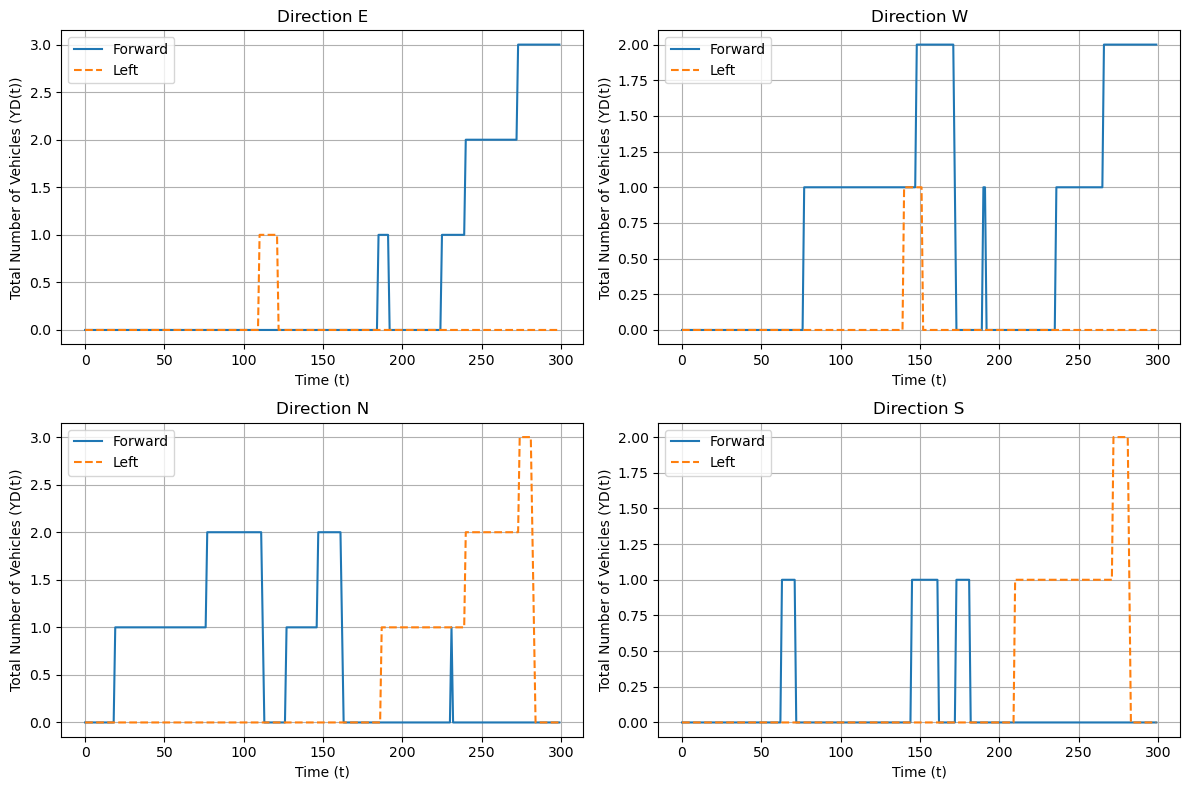

W: total average weight time per lane: 23.57601254622176s
average weight time per lane in s (nan means no cars arrived):
(E, F)     3.079636
(N, F)    36.694968
(W, F)    31.097425
(S, F)     7.505175
(E, L)     6.197586
(N, L)    49.769010
(W, L)    12.250674
(S, L)    42.013626
dtype: float64


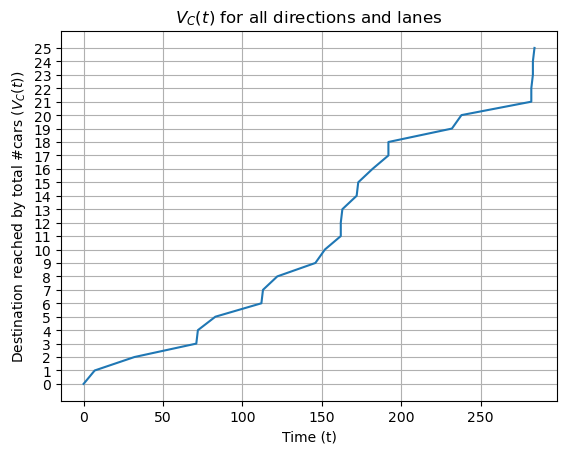

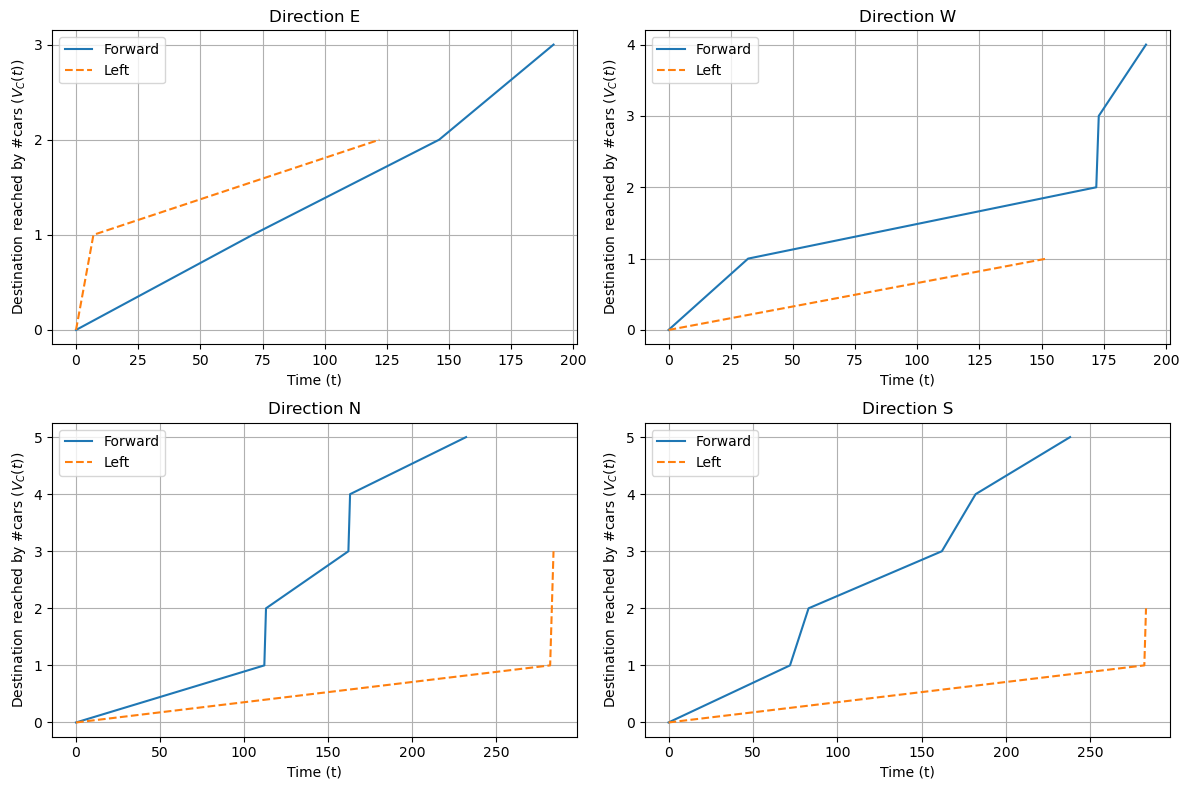

300
*********
With memory
*********


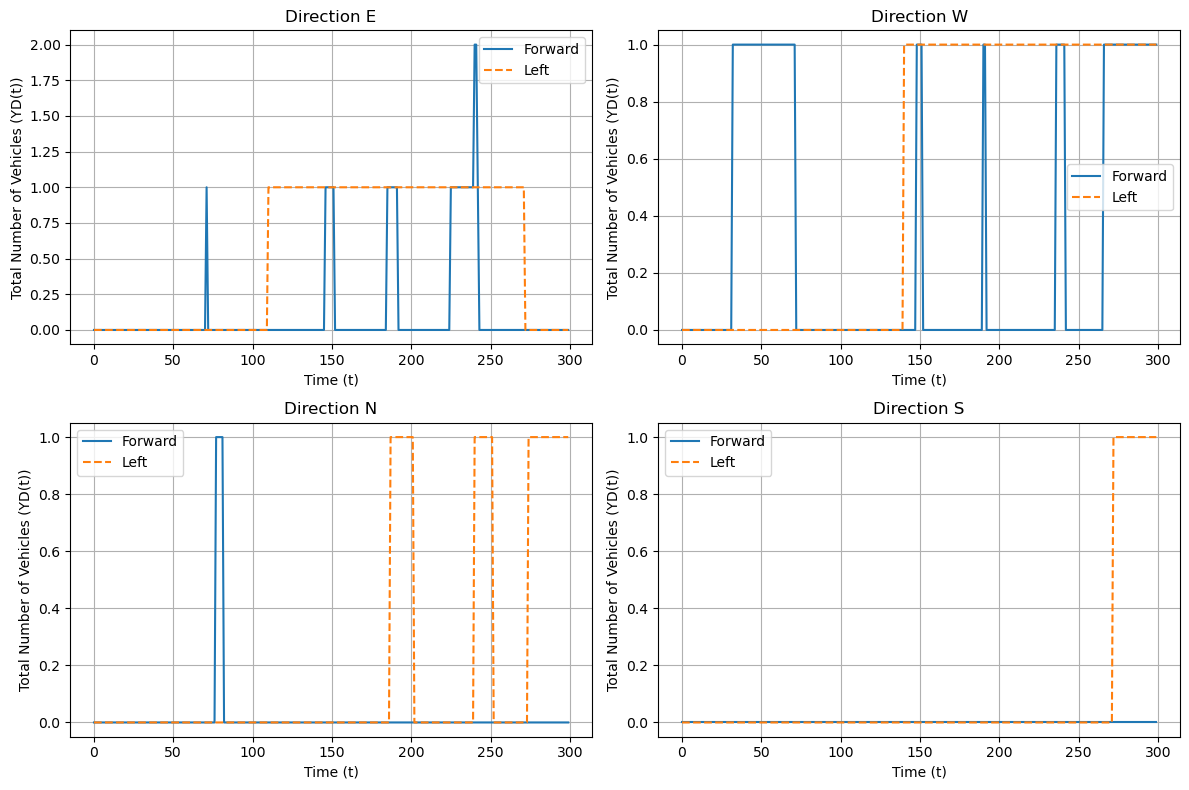

W: total average weight time per lane: 16.33492852346733s
average weight time per lane in s (nan means no cars arrived):
(E, F)     6.175679
(N, F)     1.494968
(W, F)    11.027915
(S, F)     0.505175
(E, L)    81.197586
(N, L)    13.812563
(W, L)          NaN
(S, L)     0.130613
dtype: float64


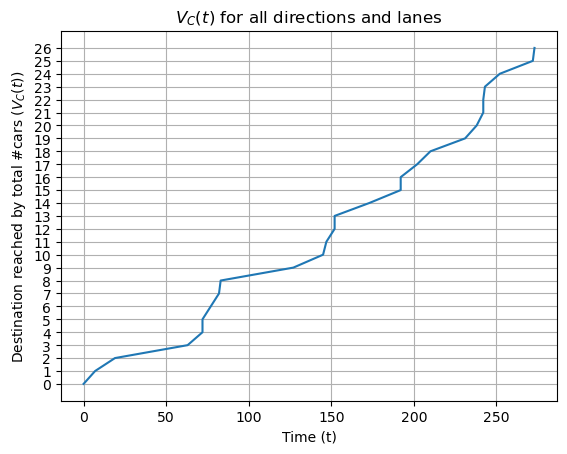

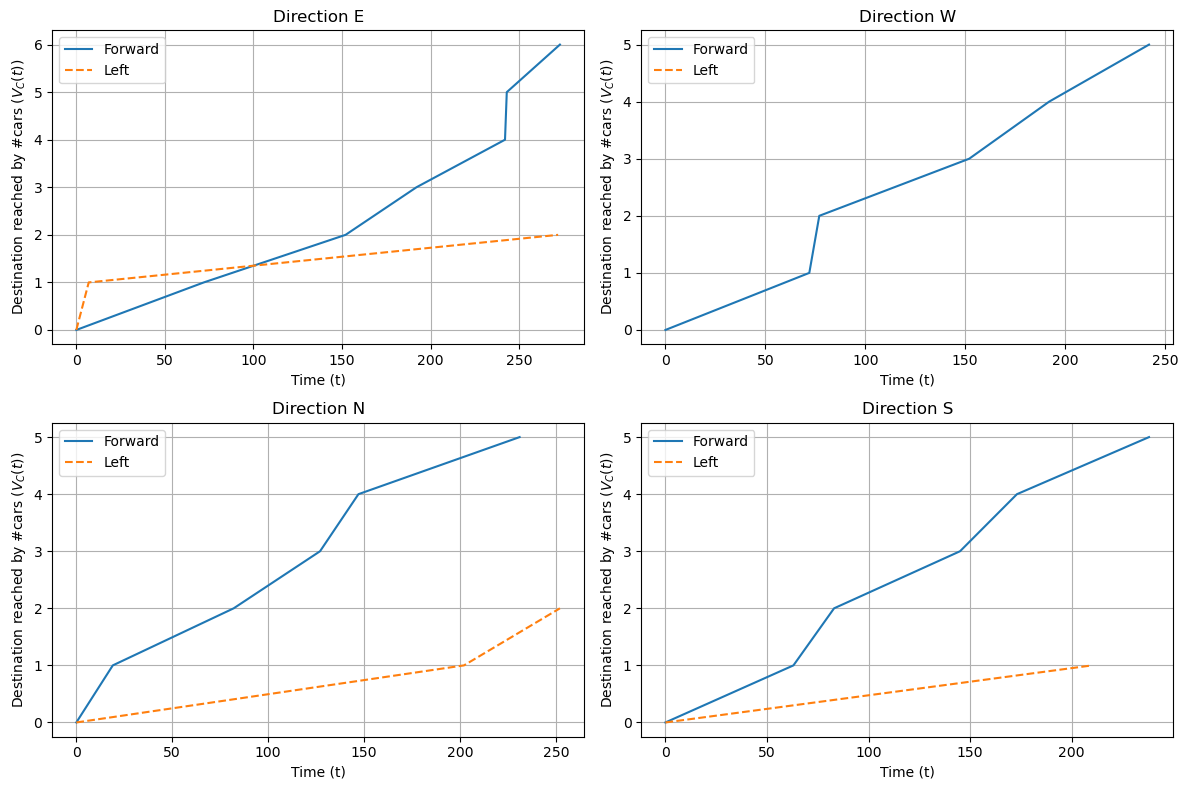

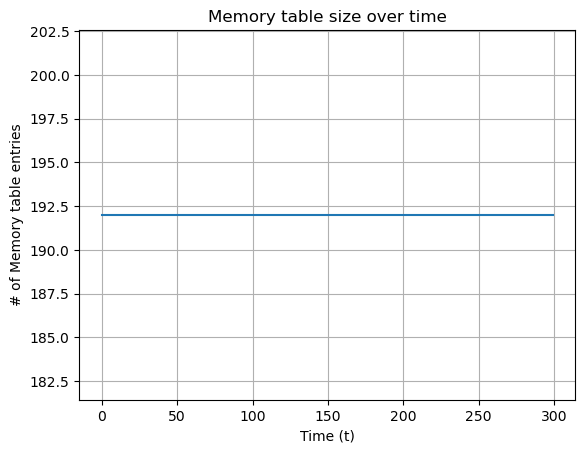

In [186]:
# the default reward function
def calculate_reward_default(current_state, next_state, action, debug=False):
    """
        Only Considers the Direction/Lane on which the action was taken
        and find the # of vehicles displaced.
    """
    difference = next_state - current_state
    if(debug):
        print(action)
        print(difference)
    reward = 0
    for d in action[0]:
        for i in action[1]:
            if(difference.state[d][i]<=0):
                reward+= -difference.state[d][i] + 1
            elif(difference.state[d][i]>=6):
                reward-= difference.state[d][i]
    return reward

def calculate_reward_diffusion(current_state, next_state, action, debug=False):
  """Calculates the diffusion coefficients of the particles (vehicles).
  Returns:
    The diffusion coefficient. 
    >0 represents array2 is a better state than array 1
  """
  # Calculate the mean signed squared displacement of the particles
  d = current_state - next_state

  diffusion_coefficient = np.mean(np.sign(d.to_numpy())*(d.to_numpy())**2)
  return diffusion_coefficient


def calculate_reward_entropy(current_state, next_state, action, debug=False):
  """Calculates the entropy difference between two arrays.

  Returns:
    The entropy difference between the two arrays.
    > 0 values represents that array2 is a better state than array 1
  """

  # add 1 to both states to make sure log(0) doesnt happen
  array1 = np.add(current_state.to_numpy(),1)
  array2 = np.add(next_state.to_numpy(),1)

  weighted_entropy1 = -np.sum(array1 * np.log(array1))

  weighted_entropy2 = -np.sum(array2 * np.log(array2))

  entropy_difference = weighted_entropy2 - weighted_entropy1
  return entropy_difference


import time
# action space
A = [(['E', 'W'], ['F']), (['E', 'W'], ['L']), 
     (['N', 'S'], ['F']), (['N', 'S'], ['L']), 
     (['E'], ['F', 'L']), (['W'], ['F', 'L']), 
     (['N'], ['F', 'L']), (['S'], ['F', 'L'])]


def SARSA(reward_func, lr=0.01, num_episodes=15, eps=0.3, gamma=0.95, eps_decay=0.00005, states_ = None, states_provided=False):

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    games_reward = []
    test_rewards = []
    duration = 300

    # arrival rates in lamda platoons per second
    arrival_rates = {'E': 5/60, 'N': 5/60, 'W': 10/60, 'S': 7/60}
    # Initialize the signal index and duration for each signal
    signal_duration = 10
    if not states_provided:
        states = x_state_t(duration=duration, action_duration=signal_duration, arrival_rates=arrival_rates, A=A, reward_function=reward_func)
    else:
        states = states_
        states.reset()
    
    for ep in range(num_episodes):
        states.reset()
        done = False
        tot_rew = 0
        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > 0.01:
            eps -= eps_decay
        # Define parameters
       
        timesteps = np.arange(1, duration + 1)
        while not done:
            #get next state
            next_state, reward, done = states.step()   
            tot_rew+=reward
            #get next action
            next_action = states.get_next_action(next_state=next_state)
            #update Qtable
            states.update_q_table(reward=reward, state_next=next_state, action_next=next_action, done=done)
            # print(f"({ep}) Elapsed time: {elapsed_time:.6f} seconds")
            if not done:
                states.apply_state(state=next_state, action=next_action)
            

        # print('For episode: {}, the total rewards is:{},  the Q table is:\n {}'.format(ep, tot_rew, states.q_table))
    print("Done")
    print("********")
    print("Test run:")
        
    '''
    Run some episodes to test the policy
    '''

    states.reset_test()
    states1 = copy.deepcopy(states)
    tot_rew = []    
    done = False
    game_rew = 0

    while not done:
        # select a greedy action
        next_state, rew, done = states.step()
        action = states.greedy(next_state)
        if not done:
            states.mem.insert(current_state=states.get_current_state(), 
                              current_action=states.current_action,
                              reward=rew, state_next=next_state, 
                              action_next=action, done=done)
            states.apply_state(next_state, action)
        game_rew += rew 
        if done:
            tot_rew.append(game_rew)
    print(f"Game {num_episodes}")
    states.plot_states()
    states.display_congestion_metric()
    

    tot_rew = []    
    done = False
    game_rew = 0
    while not done:
        # select a greedy action
        next_state, rew, done = states1.step_mem()
        action = states1.greedy_mem(next_state)
        if not done:
            states1.apply_state(next_state, action)
        states1.mem.update_size_time_array(states1.i)
        game_rew += rew 
        if done:
            tot_rew.append(game_rew)
    print(len(states1.states))
    print("*********")
    print("With memory")
    print("*********")
    states1.plot_states()
    states1.display_congestion_metric()
    

    plt.plot(range(0,duration), states1.mem.size_time)
    plt.xlabel("Time (t)")
    plt.ylabel('# of Memory table entries')
    plt.title("Memory table size over time")
    plt.grid(True)
    # Show the plot
    plt.show()  

    return states.q_table, states

Q, states = SARSA(reward_func=calculate_reward_default)


Done
********
Test run:
Game 15


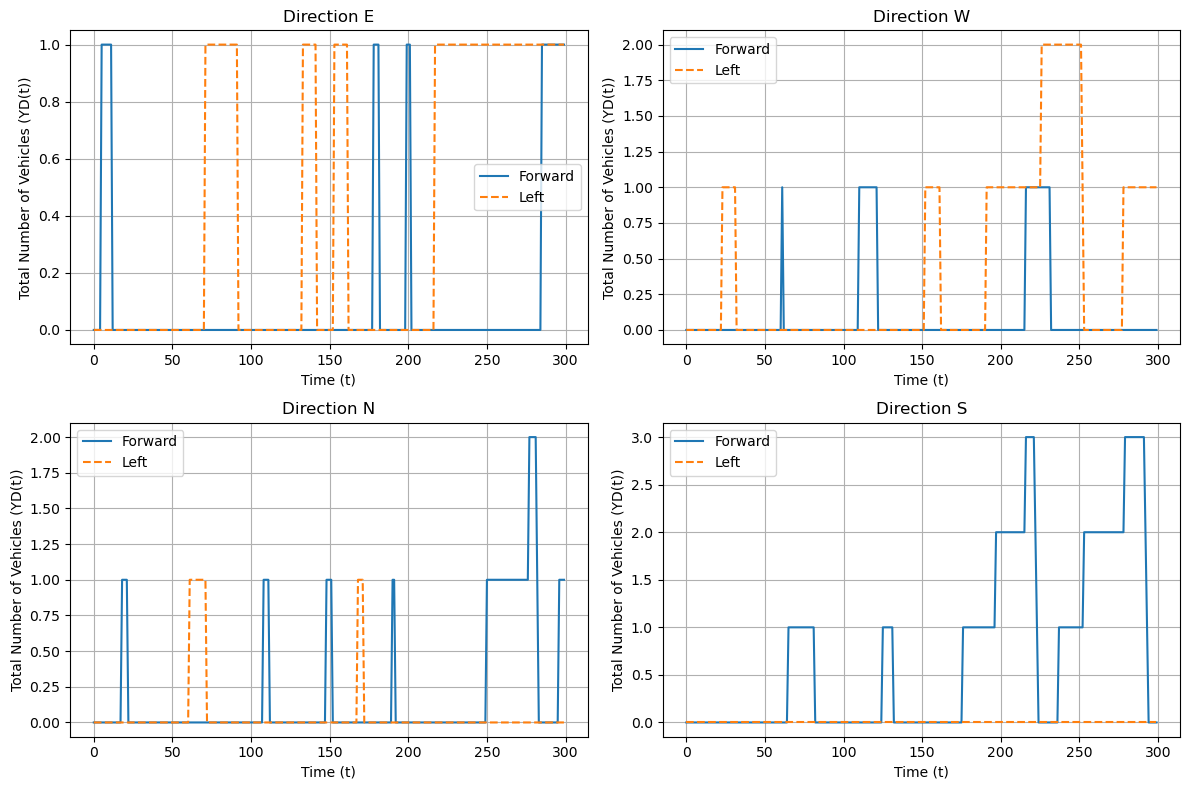

W: total average weight time per lane: 11.245916347446821s
average weight time per lane in s (nan means no cars arrived):
(E, F)     3.314436
(N, F)     7.873492
(W, F)     7.753947
(S, F)    21.928690
(E, L)    10.410982
(N, L)     5.584738
(W, L)    21.855129
(S, L)          NaN
dtype: float64


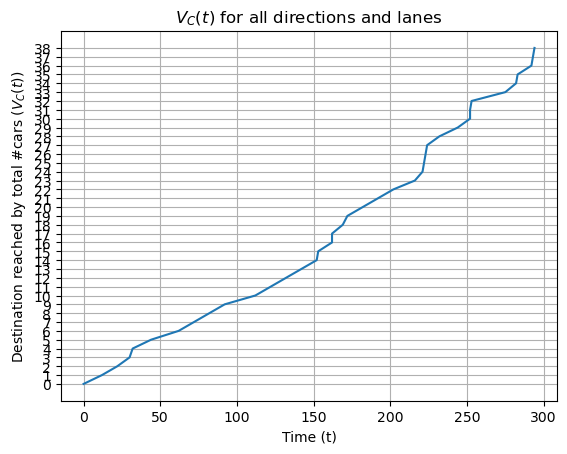

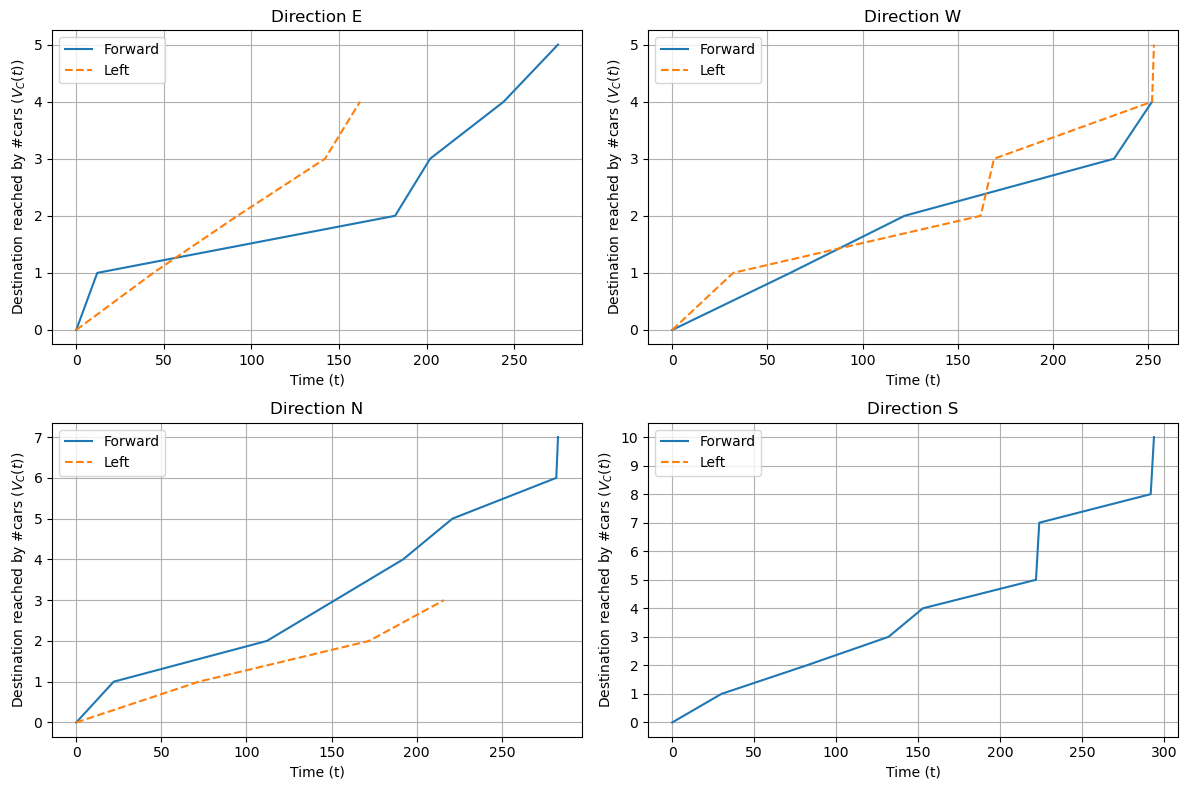

300
*********
With memory
*********


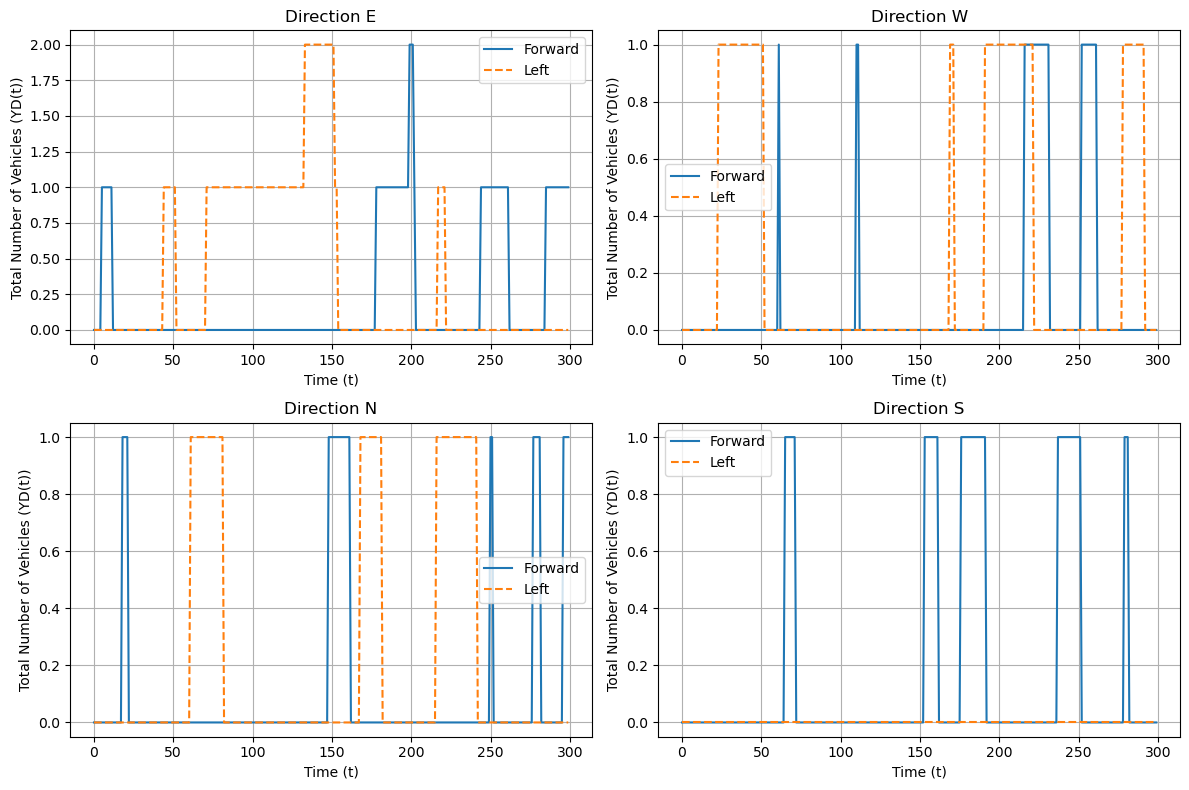

W: total average weight time per lane: 12.31381298885621s
average weight time per lane in s (nan means no cars arrived):
(E, F)    11.114436
(N, F)     4.016349
(W, F)     7.753947
(S, F)     5.528690
(E, L)    23.646302
(N, L)    20.918072
(W, L)    13.218896
(S, L)          NaN
dtype: float64


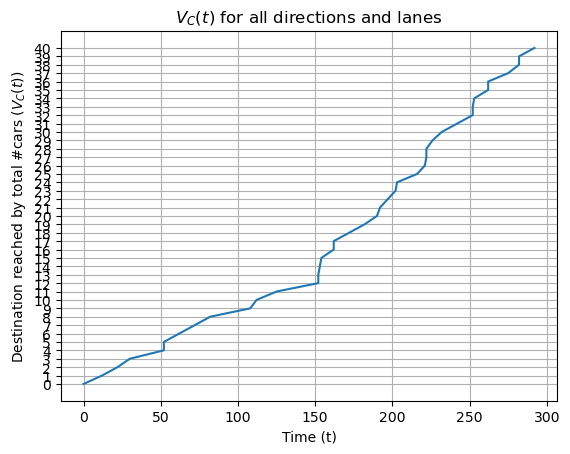

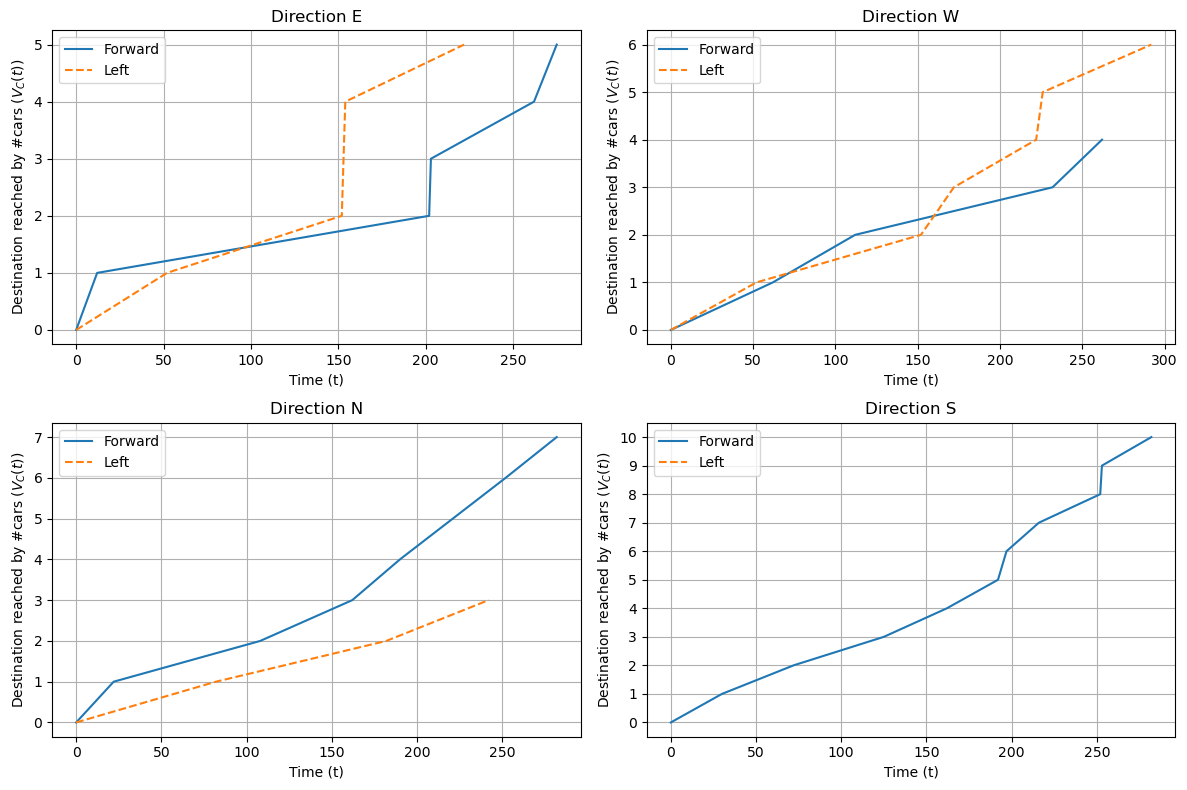

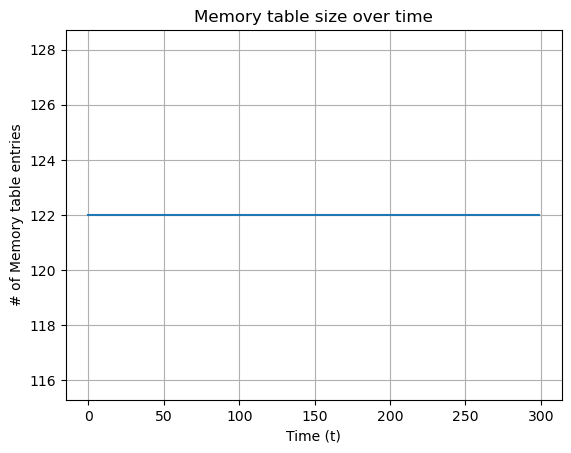

In [187]:
Q,states = SARSA(reward_func=calculate_reward_diffusion)


Done
********
Test run:
Game 15


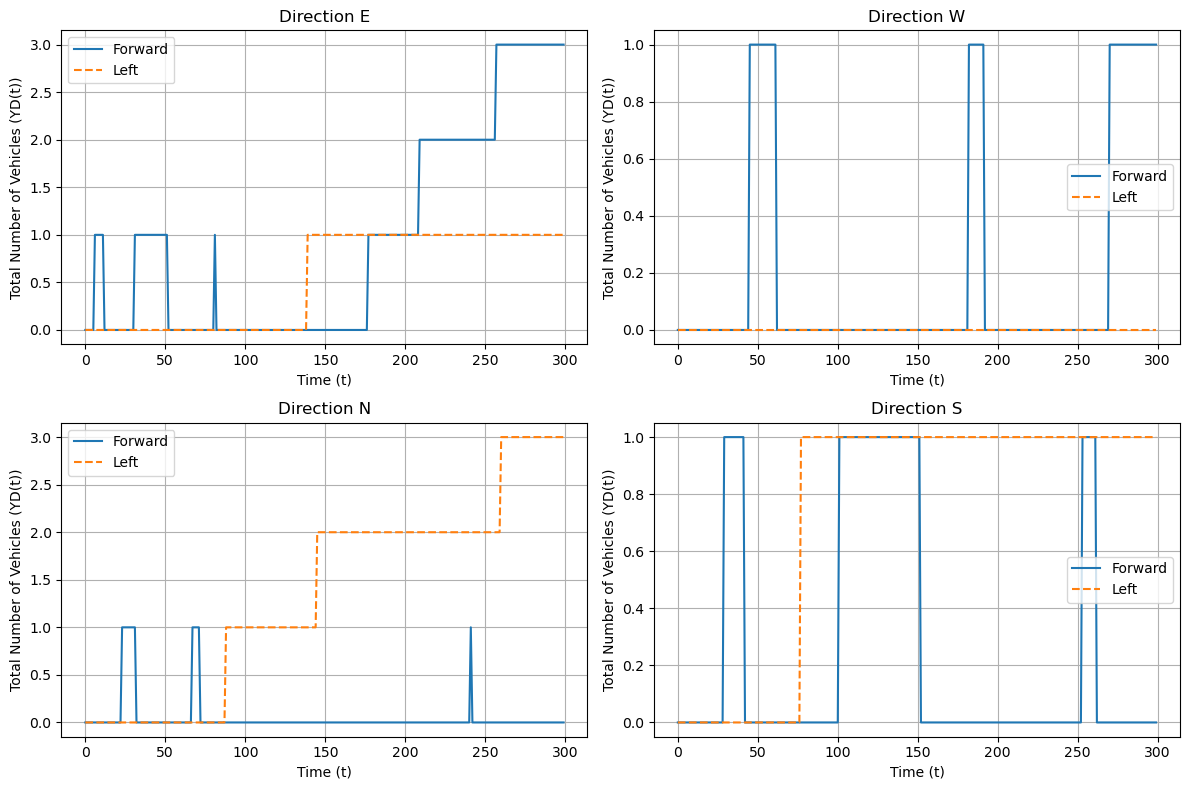

W: total average weight time per lane: 5.555431787319888s
average weight time per lane in s (nan means no cars arrived):
(E, F)     7.431094
(N, F)     3.694945
(W, F)     5.010854
(S, F)    10.915875
(E, L)          NaN
(N, L)          NaN
(W, L)     0.724391
(S, L)          NaN
dtype: float64


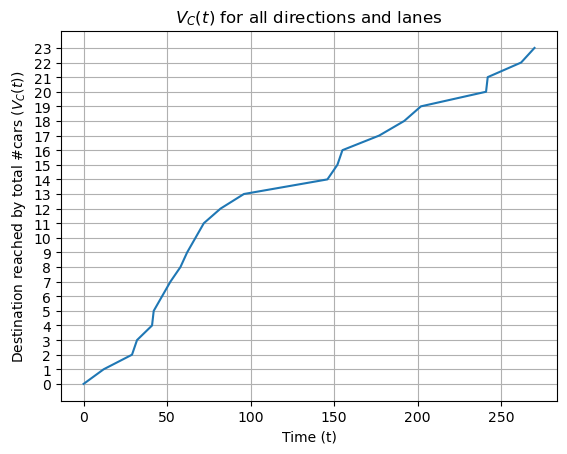

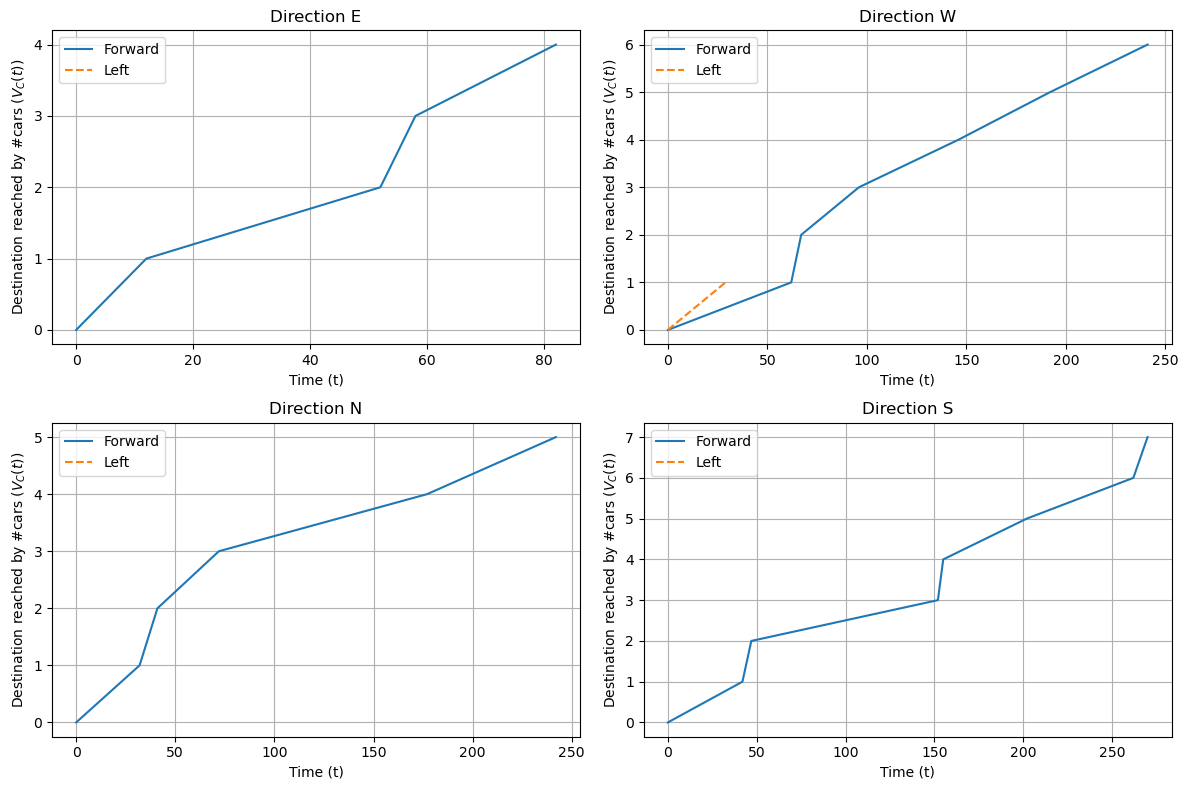

300
*********
With memory
*********


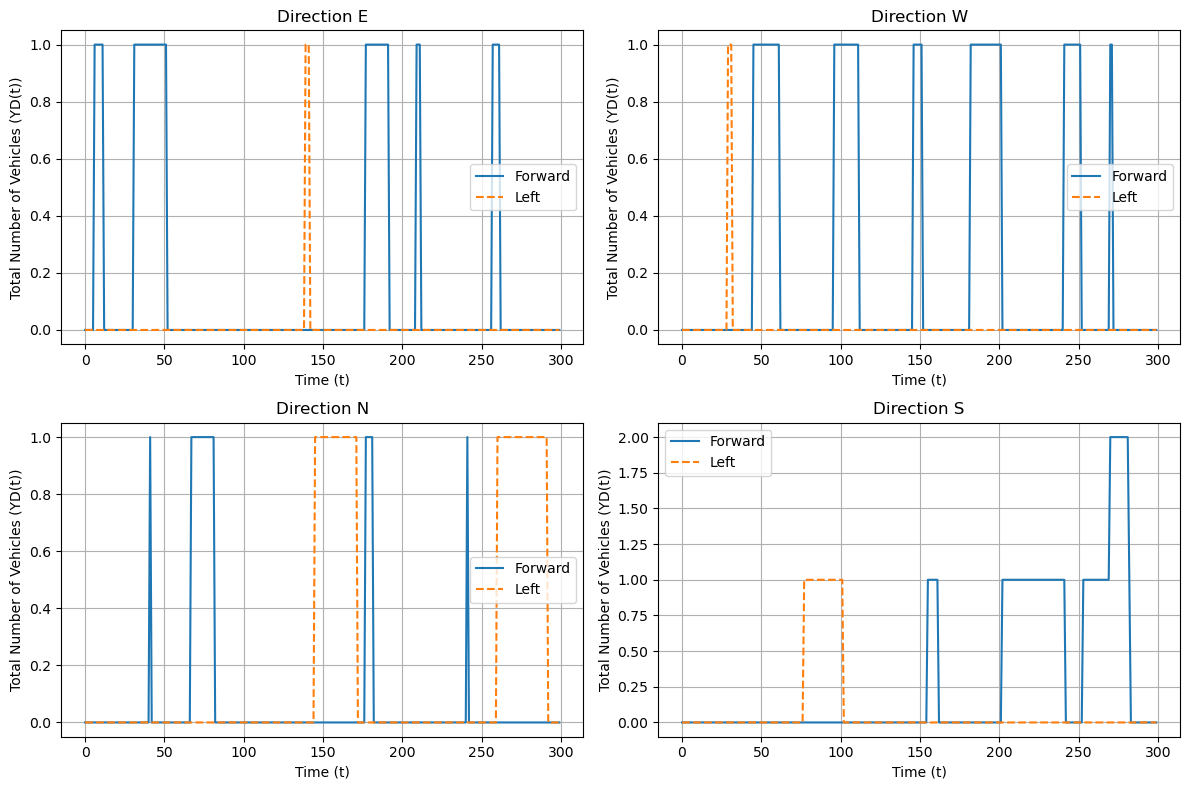

W: total average weight time per lane: 11.192341828071111s
average weight time per lane in s (nan means no cars arrived):
(E, F)     7.625873
(N, F)     5.094945
(W, F)    10.781524
(S, F)    13.201589
(E, L)     3.316698
(N, L)    20.332998
(W, L)     3.724391
(S, L)    25.460716
dtype: float64


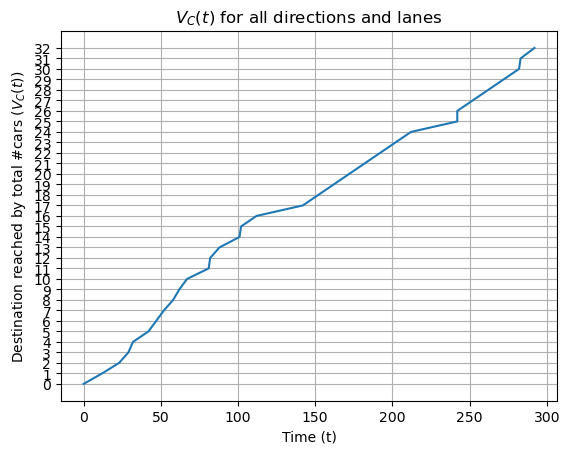

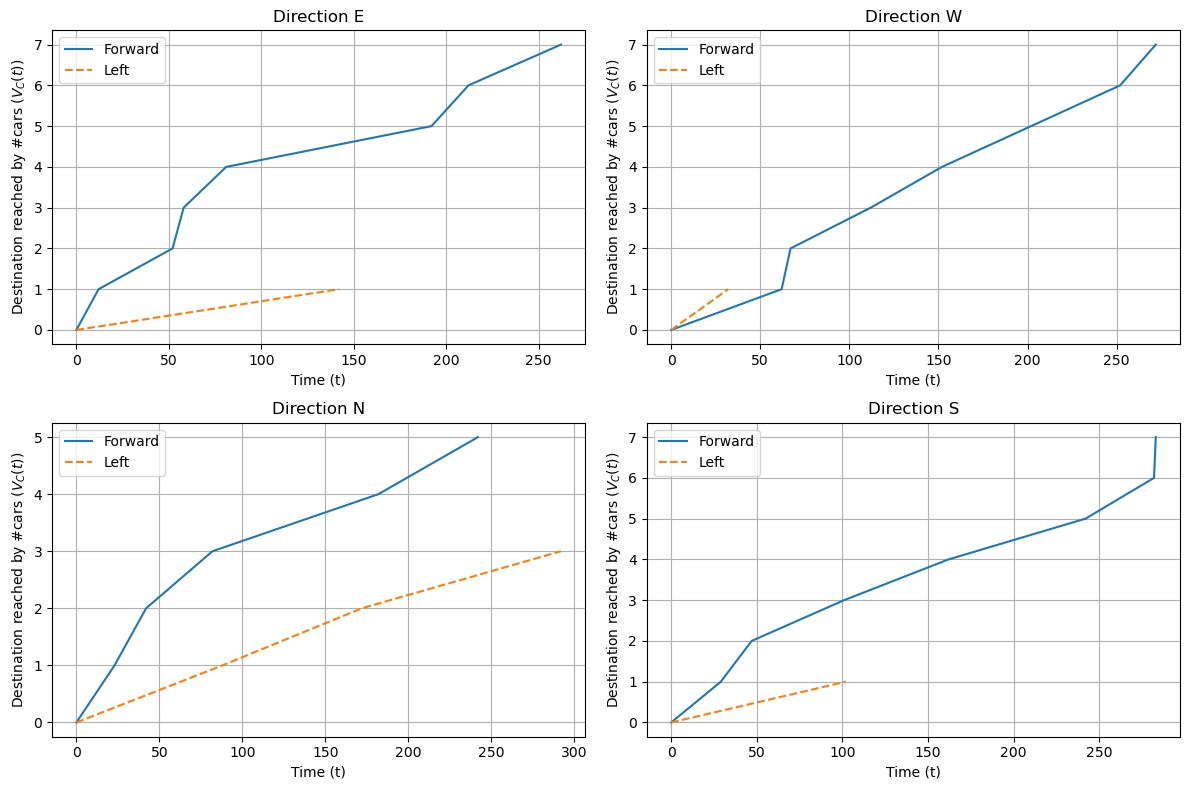

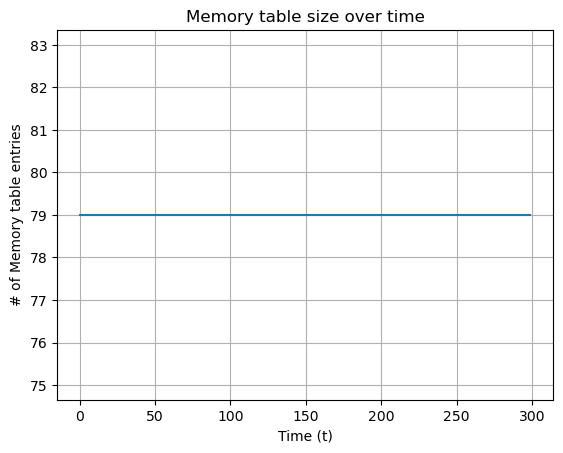

In [188]:
Q,states = SARSA(reward_func=calculate_reward_entropy)